## Import Libraries

In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Prepare Data

In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# Define dataset path and clothing categories
dataset_path = "/kaggle/input/new-data-fashion/Apparel images dataset new"
category_list = os.listdir(dataset_path)
category_list

['black_pants',
 'blue_shirt',
 'blue_pants',
 'blue_shoes',
 'black_dress',
 'black_shorts',
 'blue_dress',
 'black_shirt',
 'blue_shorts',
 'black_shoes']

In [6]:
# Map categories to numerical labels based on their order in the list
category_to_label = {category: index for index, category in enumerate(category_list)}
category_to_label

{'black_pants': 0,
 'blue_shirt': 1,
 'blue_pants': 2,
 'blue_shoes': 3,
 'black_dress': 4,
 'black_shorts': 5,
 'blue_dress': 6,
 'black_shirt': 7,
 'blue_shorts': 8,
 'black_shoes': 9}

In [7]:
label_to_category = {index: category for category, index in category_to_label.items()}
label_to_category

{0: 'black_pants',
 1: 'blue_shirt',
 2: 'blue_pants',
 3: 'blue_shoes',
 4: 'black_dress',
 5: 'black_shorts',
 6: 'blue_dress',
 7: 'black_shirt',
 8: 'blue_shorts',
 9: 'black_shoes'}

In [8]:
# Initialize lists to store filenames and their corresponding labels
filenames = []
categories = []

# Iterate through each category and collect file paths and labels
for category in category_list:
    category_path = os.path.join(dataset_path, category)
    for file_name in os.listdir(category_path):
        full_path = os.path.join(category_path, file_name)
        filenames.append(full_path)
        categories.append(category_to_label[category])

# Create a DataFrame to store the dataset information
df = pd.DataFrame({'filename': filenames, 'category': categories})

# Display the DataFrame
print(df.head())

                                            filename  category
0  /kaggle/input/new-data-fashion/Apparel images ...         0
1  /kaggle/input/new-data-fashion/Apparel images ...         0
2  /kaggle/input/new-data-fashion/Apparel images ...         0
3  /kaggle/input/new-data-fashion/Apparel images ...         0
4  /kaggle/input/new-data-fashion/Apparel images ...         0


## Plot Random Images

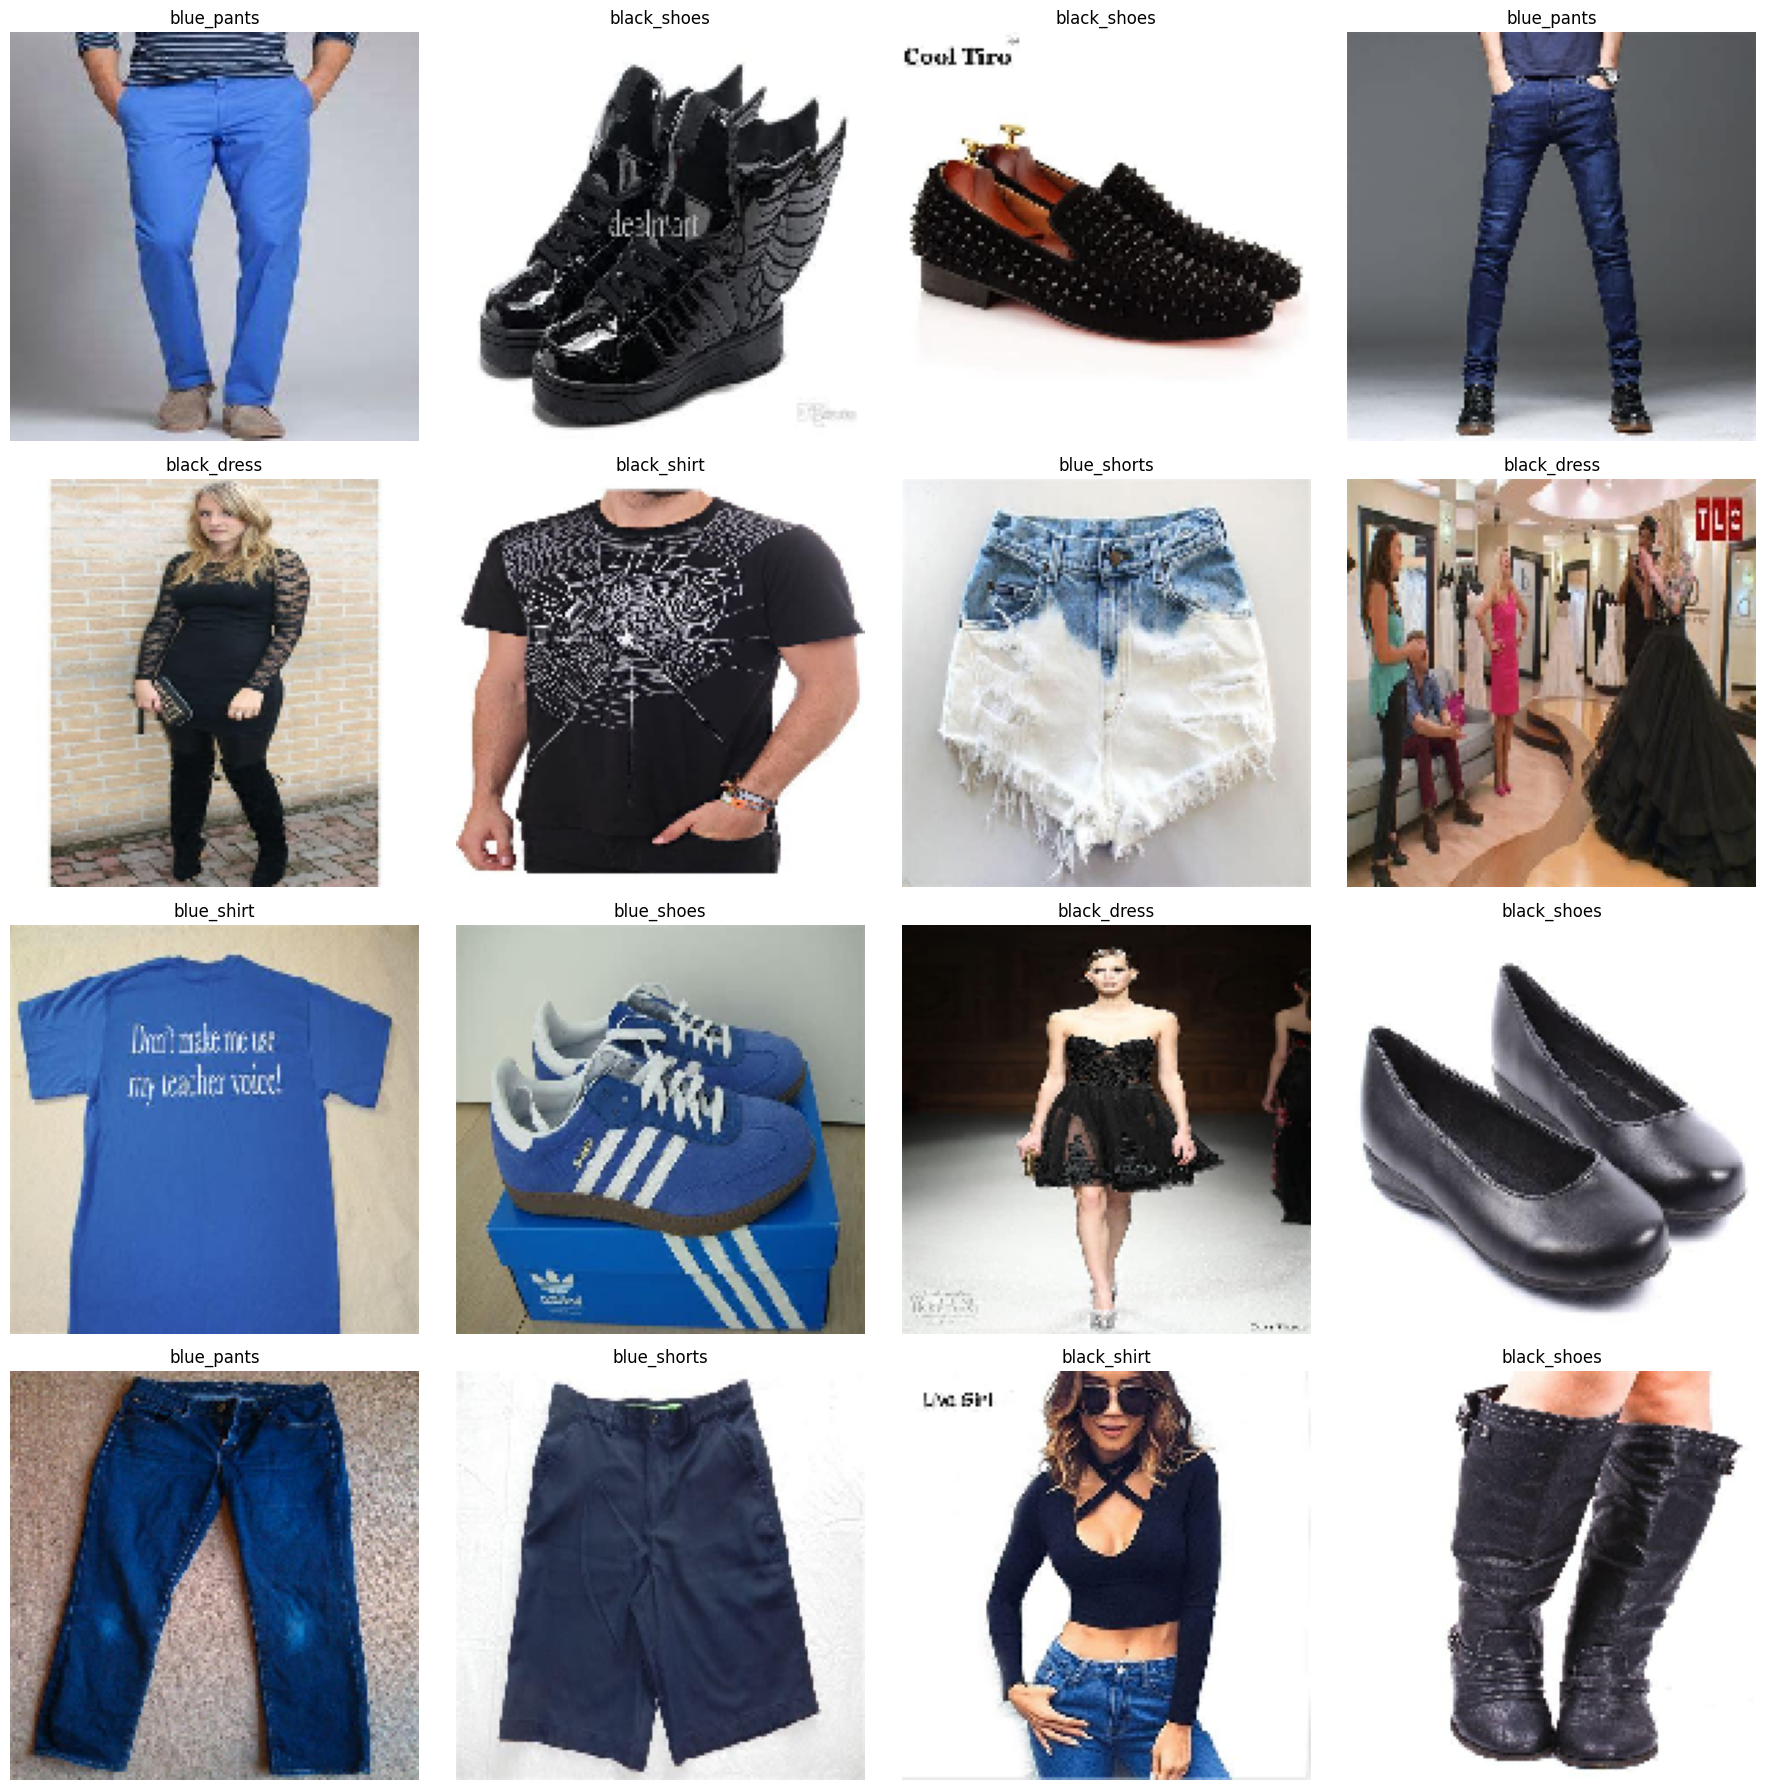

In [9]:
num_images=16
grid_size=(4, 4)
image_size=(150, 150)

plt.figure(figsize=(grid_size[0] * 4.5, grid_size[1] * 4.5))
sampled_indices = random.sample(range(len(df)), num_images)

for i, idx in enumerate(sampled_indices):
    label = label_to_category[df['category'].iloc[idx]]
    image = load_img(df['filename'].iloc[idx], target_size=image_size)
    
    plt.subplot(grid_size[0], grid_size[1], i + 1)
    plt.title(label, fontsize=12)
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Splitting Dataset

In [10]:
df_train , df_valid = train_test_split(df, test_size=0.2, random_state=42)
df_train.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
df_train.shape, df_valid.shape

((4794, 2), (1199, 2))

## Check Class Distribution

In [11]:
def get_classes_distribution(data):
    """
    Displays the distribution of classes in the dataset.
    """
    # Get the count for each label
    label_counts = data["category"].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Print class distribution
    print(f"{'Class':<20}{'Count':<10}{'Percentage':<10}")
    print("-" * 40)
    for label, count in label_counts.items():
        label = label_to_category[label]
        percentage = (count / total_samples) * 100
        print(f"{label:<20}{count:<10}{percentage:.2f}%")


In [12]:
get_classes_distribution(df_train)

Class               Count     Percentage
----------------------------------------
black_pants         677       14.12%
blue_pants          638       13.31%
black_shoes         602       12.56%
blue_shirt          586       12.22%
black_shirt         585       12.20%
blue_shoes          415       8.66%
blue_dress          400       8.34%
black_dress         379       7.91%
black_shorts        267       5.57%
blue_shorts         245       5.11%


In [13]:
get_classes_distribution(df_valid)

Class               Count     Percentage
----------------------------------------
black_pants         194       16.18%
black_shoes         164       13.68%
blue_pants          160       13.34%
blue_shirt          155       12.93%
black_shirt         130       10.84%
blue_shoes          108       9.01%
blue_dress          102       8.51%
black_dress         71        5.92%
black_shorts        61        5.09%
blue_shorts         54        4.50%


In [14]:
def plot_label_per_class(data):
    """
    Plots the distribution of labels per class in the dataset.
    """
    # Create a plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(
        x=data["category"],
        order=data["category"].value_counts().index,
        ax=ax
    )
    g.set_title("Number of Labels for Each Class", fontsize=16)
    g.set_xlabel("Labels", fontsize=12)
    g.set_ylabel("Count", fontsize=12)

    # Add annotations
    for p, label in zip(g.patches, data["category"].value_counts().index):
        category_name = label_to_category[label]
        count = int(p.get_height())
        g.annotate(
            f"{category_name}: {count}",
            (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
            ha='center', va='bottom', fontsize=9, color='black'
        )

    # Display the plot
    plt.tight_layout()
    plt.show()

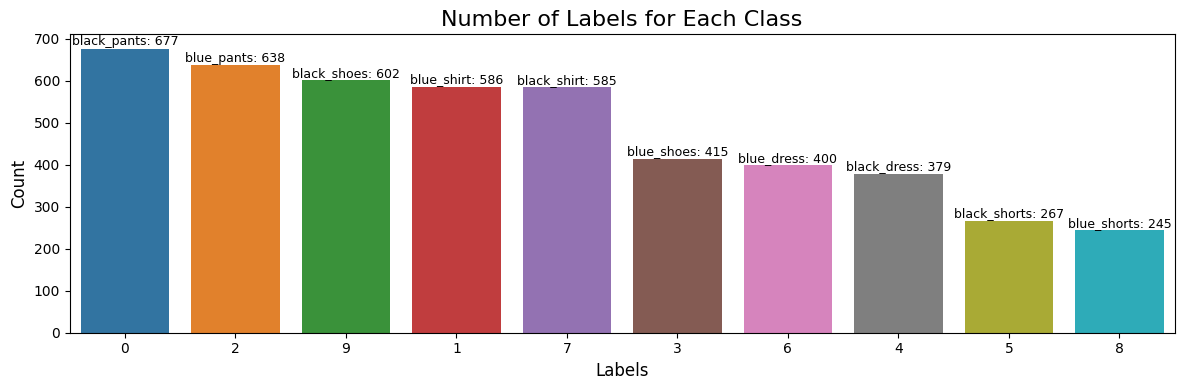

In [15]:
plot_label_per_class(df_train)

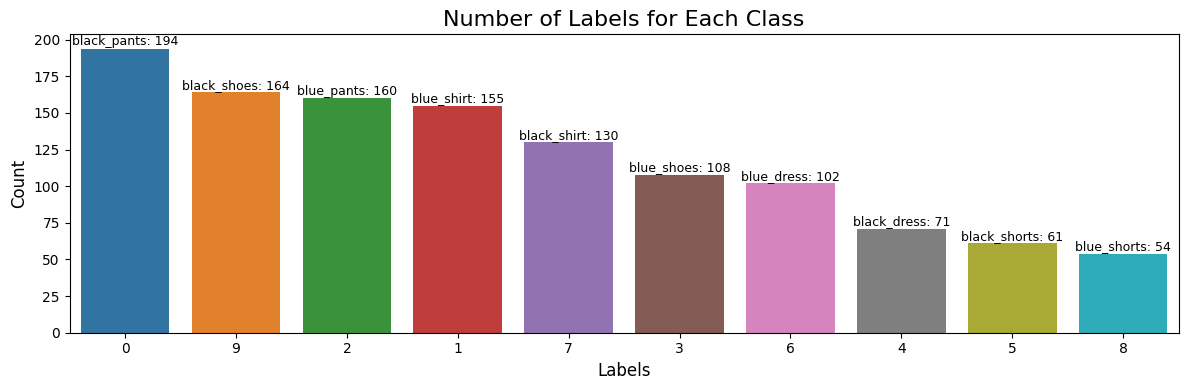

In [16]:
plot_label_per_class(df_valid)

## Check Class Imbalance

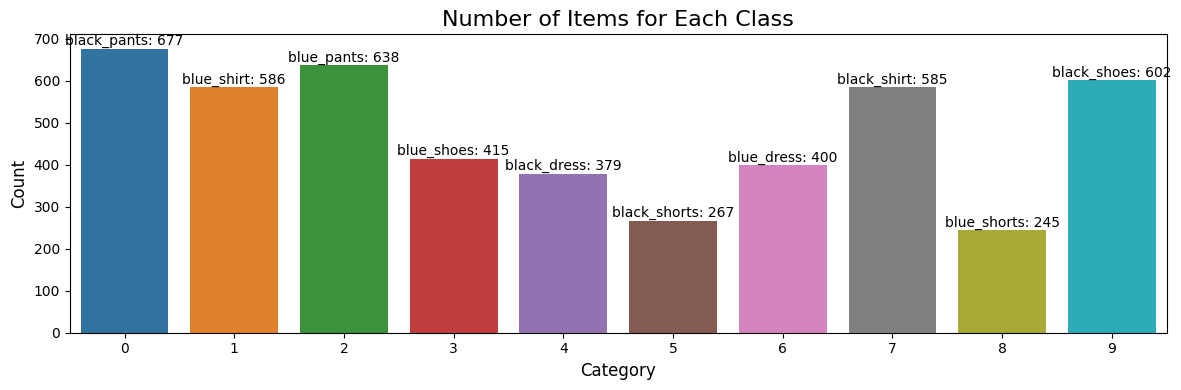

Class               Count     Percentage
----------------------------------------
blue_shoes          415       8.66%
black_shoes         602       12.56%
blue_pants          638       13.31%
black_pants         677       14.12%
black_shirt         585       12.20%
blue_dress          400       8.34%
blue_shirt          586       12.22%
blue_shorts         245       5.11%
black_dress         379       7.91%
black_shorts        267       5.57%


In [17]:
def plot_count_per_class(y_data, num_classes=10):
    """
    Plots the count of items for each class.
    """
    # Create a DataFrame for visualization
    y_df = pd.DataFrame(y_data, columns=["class_index"])
    
    # Plot the count per class
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    sns.countplot(
        x=y_df["class_index"],
        order=np.arange(num_classes),
        ax=ax
    )
    ax.set_title("Number of Items for Each Class", fontsize=16)
    ax.set_xlabel("Category", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    # Add annotations for each bar
    for p in ax.patches:
        label_idx = int(p.get_x() + 0.5)
        class_label = label_to_category[label_idx]
        count = int(p.get_height())
        ax.annotate(
            f"{class_label}: {count}",
            (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
            ha='center', va='bottom', fontsize=10, color='black'
        )
    
    plt.tight_layout()
    plt.show()

def get_count_per_class(y_data):
    """
    Prints the count and percentage of items for each class.
    """
    # Create a DataFrame for easier analysis
    y_df = pd.DataFrame(y_data, columns=["class_index"])
    
    # Get value counts
    label_counts = y_df["class_index"].value_counts(sort=False)
    total_samples = len(y_data)

    # Print the count and percentage for each class
    print(f"{'Class':<20}{'Count':<10}{'Percentage'}")
    print("-" * 40)
    for idx, count in label_counts.items():
        class_label = label_to_category[idx]
        percent = (count / total_samples) * 100
        print(f"{class_label:<20}{count:<10}{percent:.2f}%")


# Check training data
y_data = df_train['category'].values

plot_count_per_class(y_data)
get_count_per_class(y_data)

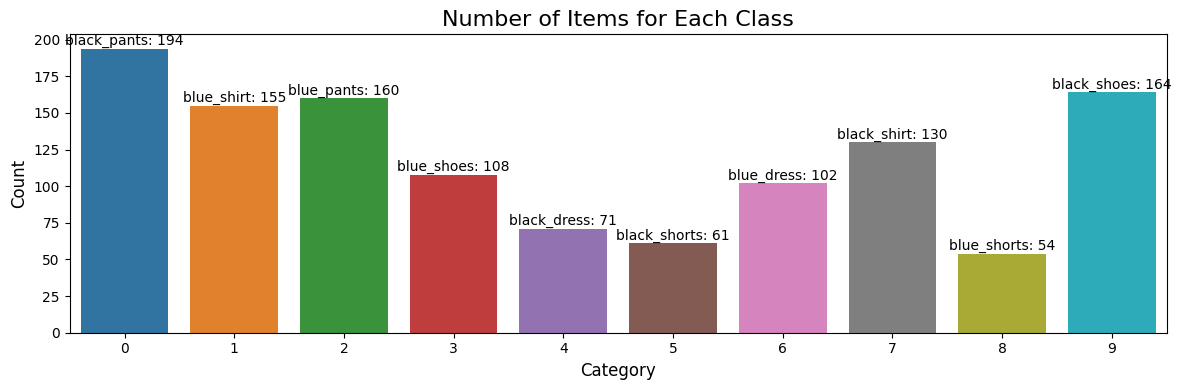

Class               Count     Percentage
----------------------------------------
blue_pants          160       13.34%
blue_shoes          108       9.01%
black_pants         194       16.18%
black_dress         71        5.92%
blue_shirt          155       12.93%
black_shirt         130       10.84%
black_shoes         164       13.68%
blue_dress          102       8.51%
blue_shorts         54        4.50%
black_shorts        61        5.09%


In [18]:
# Check validataion data
y_data = df_valid['category'].values

plot_count_per_class(y_data)
get_count_per_class(y_data)

## Pre-trained Convolutional Neural Networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

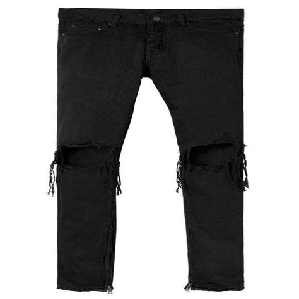

In [19]:
file_name = df['filename'].iloc[0]
img = load_img(file_name, target_size=(299, 299))
img

In [20]:
X = np.array([img])
X.shape

(1, 299, 299, 3)

In [21]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [22]:
X = preprocess_input(X)

In [23]:
pred = model.predict(X)

I0000 00:00:1733416725.331197      69 service.cc:145] XLA service 0x7c497c0021a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733416725.331262      69 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1733416728.154959      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [24]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03594734', 'jean', 0.6378318),
  ('n02916936', 'bulletproof_vest', 0.027462892),
  ('n04371430', 'swimming_trunks', 0.022303455),
  ('n03763968', 'military_uniform', 0.013248202),
  ('n04350905', 'suit', 0.0064262287)]]

## Transfer Learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

In [25]:
input_size = 150

In [26]:
# df_train['category'] = df_train['category'].astype(str)
# df_valid['category'] = df_valid['category'].astype(str)

df_train['category'] = df_train['category'].apply(lambda x: label_to_category[x])
df_valid['category'] = df_valid['category'].apply(lambda x: label_to_category[x])

In [27]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_dataframe(
    dataframe=df_train, 
    x_col='filename', 
    y_col='category', 
    target_size=(input_size, input_size),
    batch_size=32,
    class_mode='categorical', # sparse
    shuffle=True
)

Found 4794 validated image filenames belonging to 10 classes.


In [28]:
train_ds.class_indices

{'black_dress': 0,
 'black_pants': 1,
 'black_shirt': 2,
 'black_shoes': 3,
 'black_shorts': 4,
 'blue_dress': 5,
 'blue_pants': 6,
 'blue_shirt': 7,
 'blue_shoes': 8,
 'blue_shorts': 9}

In [29]:
X, y = next(train_ds)

In [30]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_dataframe(
    dataframe=df_valid, 
    x_col='filename', 
    y_col='category', 
    target_size=(input_size, input_size),
    batch_size=32,
    class_mode='categorical', # sparse
    shuffle=False
)

Found 1199 validated image filenames belonging to 10 classes.


In [32]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [33]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [34]:
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 361ms/step - accuracy: 0.6954 - loss: 1.0781 - val_accuracy: 0.8524 - val_loss: 0.4988
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8855 - loss: 0.3812 - val_accuracy: 0.8557 - val_loss: 0.5979
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9124 - loss: 0.2806 - val_accuracy: 0.8974 - val_loss: 0.4111
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.9504 - loss: 0.1506 - val_accuracy: 0.8982 - val_loss: 0.3906
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9529 - loss: 0.1487 - val_accuracy: 0.8824 - val_loss: 0.4995
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.9699 - loss: 0.0877 - val_accuracy: 0.8899 - val_loss: 0.4974
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9696 - loss: 0.0892 - val_accuracy: 0.8882 - val_loss: 0.5155
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.9805 - loss: 0.0640 -

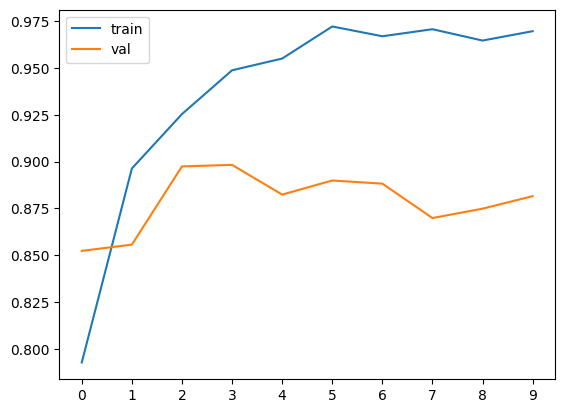

In [35]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjust learning rate

In [36]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=valid_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.2615 - loss: 2.0168 - val_accuracy: 0.6697 - val_loss: 1.1498
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.7128 - loss: 1.0452 - val_accuracy: 0.7815 - val_loss: 0.8002
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.7838 - loss: 0.7739 - val_accuracy: 0.8215 - val_loss: 0.6473
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.8241 - loss: 0.6302 - val_accuracy: 0.8482 - val_loss: 0.5633
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.8390 - loss: 0.5618 - val_accuracy: 0.8666 - val_loss: 0.5074
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.8595 - loss: 0.4969 - val_accuracy: 0.8707 - val_loss: 0.4713
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.8711 - loss: 0.4568 - val_accuracy: 0.8782 - val_loss: 0.4416
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.8822 - loss: 0

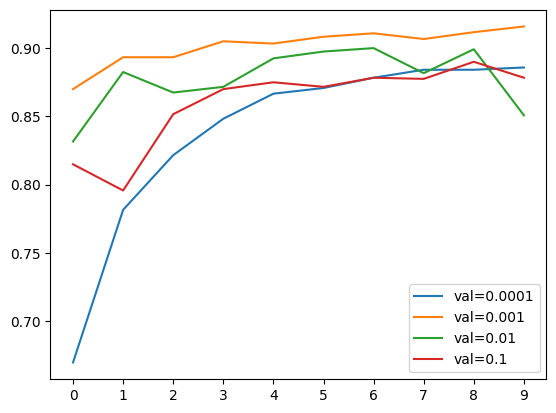

In [38]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [39]:
learning_rate = 0.001

## Adding one more layer

In [40]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [41]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=valid_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.5527 - loss: 1.3293 - val_accuracy: 0.8449 - val_loss: 0.4762
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.8637 - loss: 0.4215 - val_accuracy: 0.8674 - val_loss: 0.3928
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9005 - loss: 0.3053 - val_accuracy: 0.8841 - val_loss: 0.3313
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9178 - loss: 0.2524 - val_accuracy: 0.8899 - val_loss: 0.3133
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9380 - loss: 0.2088 - val_accuracy: 0.8932 - val_loss: 0.3053
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9421 - loss: 0.1815 - val_accuracy: 0.8991 - val_loss: 0.2905
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9526 - loss: 0.1550 - val_accuracy: 0.9033 - val_loss: 0.2823
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9637 - loss: 0.131

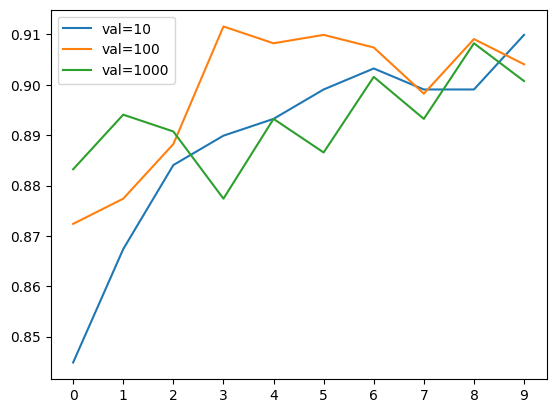

In [42]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks()
plt.legend()

## Regularization and dropout

In [43]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [44]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=10, validation_data=valid_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.6957 - loss: 0.8705 - val_accuracy: 0.8774 - val_loss: 0.3616
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9025 - loss: 0.2715 - val_accuracy: 0.8891 - val_loss: 0.3090
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9439 - loss: 0.1781 - val_accuracy: 0.8991 - val_loss: 0.2799
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9496 - loss: 0.1504 - val_accuracy: 0.8966 - val_loss: 0.3013
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.9682 - loss: 0.0959 - val_accuracy: 0.9066 - val_loss: 0.2606
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9791 - loss: 0.0737 - val_accuracy: 0.9108 - val_loss: 0.2663
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9887 - loss: 0.0528 - val_accuracy: 0.9099 - val_loss: 0.2825
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9883 - loss: 0.04

## Data augmentation

In [45]:
input_size = 150

In [46]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,        
    width_shift_range=0.1,     
    height_shift_range=0.1,   
    shear_range=0.1,           
    zoom_range=0.1,           
    horizontal_flip=True,
    # vertical_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_dataframe(
    dataframe=df_train, 
    x_col='filename', 
    y_col='category', 
    target_size=(input_size, input_size),
    batch_size=32,
    class_mode='categorical', # sparse
    shuffle=True
)

valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_dataframe(
    dataframe=df_valid, 
    x_col='filename', 
    y_col='category', 
    target_size=(input_size, input_size),
    batch_size=32,
    class_mode='categorical', # sparse
    shuffle=False
)

Found 4794 validated image filenames belonging to 10 classes.
Found 1199 validated image filenames belonging to 10 classes.


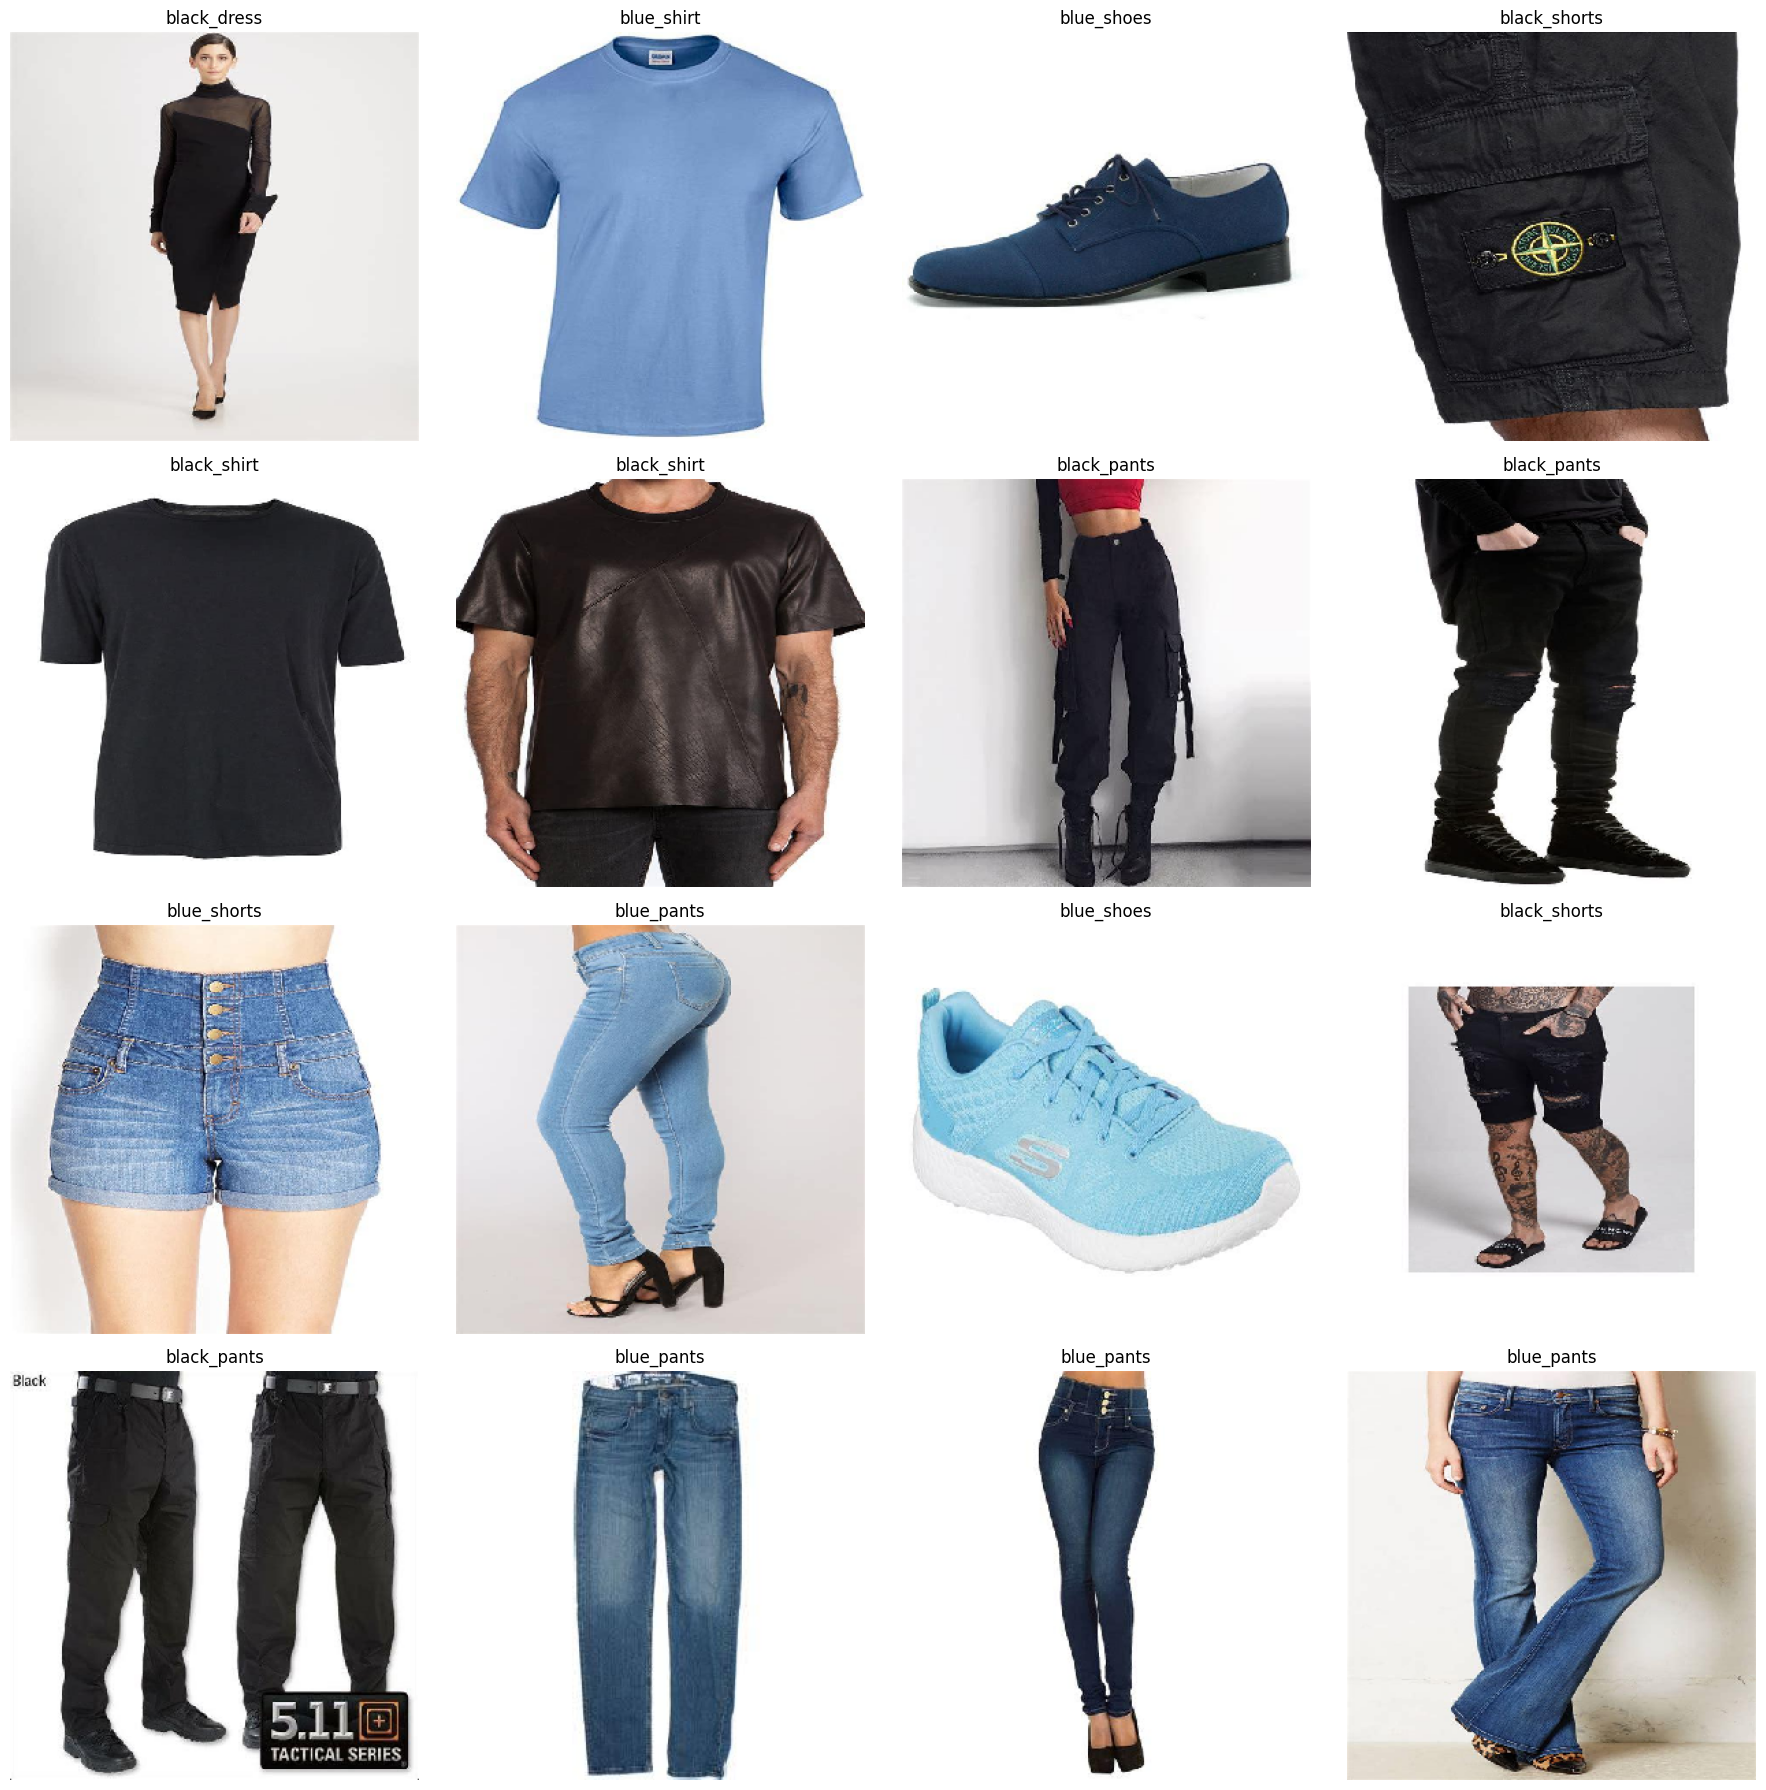

In [47]:
num_images=16
grid_size=(4, 4)
image_size=(299, 299)

plt.figure(figsize=(grid_size[0] * 4.5, grid_size[1] * 4.5))
sampled_indices = random.sample(range(len(df)), num_images)

for i, idx in enumerate(sampled_indices):
    label = label_to_category[df['category'].iloc[idx]]
    image = load_img(df['filename'].iloc[idx], target_size=image_size)
    
    plt.subplot(grid_size[0], grid_size[1], i + 1)
    plt.title(label, fontsize=12)
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [48]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.5708 - loss: 1.1907 - val_accuracy: 0.8741 - val_loss: 0.3586
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - accuracy: 0.8211 - loss: 0.5293 - val_accuracy: 0.8816 - val_loss: 0.3295
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 210ms/step - accuracy: 0.8449 - loss: 0.4516 - val_accuracy: 0.8941 - val_loss: 0.2898
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 213ms/step - accuracy: 0.8572 - loss: 0.4133 - val_accuracy: 0.8991 - val_loss: 0.2819
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 211ms/step - accuracy: 0.8760 - loss: 0.3712 - val_accuracy: 0.8799 - val_loss: 0.3424
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 211ms/step - accuracy: 0.8827 - loss: 0.3444 - val_accuracy: 0.9016 - val_loss: 0.2667
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 212ms/step - accuracy: 0.8831 - loss: 0.3255 - val_accuracy: 0.9033 - val_loss: 0.2678
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 209ms/step - accuracy: 0.8922 - loss: 0

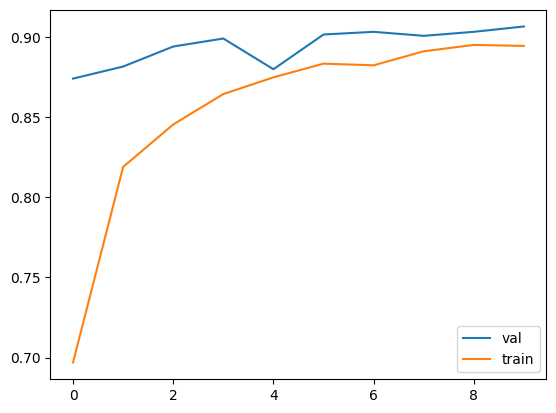

In [49]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Train Larger Model

In [50]:
input_size = 299

In [51]:
def make_model(input_size=150, learning_rate=0.001, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [52]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,        
    width_shift_range=0.1,     
    height_shift_range=0.1,   
    shear_range=0.1,           
    zoom_range=0.1,           
    horizontal_flip=True,
    # vertical_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_dataframe(
    dataframe=df_train, 
    x_col='filename', 
    y_col='category', 
    target_size=(input_size, input_size),
    batch_size=32,
    class_mode='categorical', # sparse
    shuffle=True
)

valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_dataframe(
    dataframe=df_valid, 
    x_col='filename', 
    y_col='category', 
    target_size=(input_size, input_size),
    batch_size=32,
    class_mode='categorical', # sparse
    shuffle=False
)

Found 4794 validated image filenames belonging to 10 classes.
Found 1199 validated image filenames belonging to 10 classes.


## Callbacks
* Saving the best model only
* Learning rate schedular
* Early Stopping
* Training a model with callbacks

In [53]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_best.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [54]:
reduceLR= keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [checkpoint, reduceLR, earlystop]

In [55]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

# history = model.fit(train_ds, epochs=20, validation_data=valid_ds,
#                    callbacks=callbacks)

In [56]:
# hist = history.history
# plt.plot(hist['val_accuracy'], label='val')
# plt.plot(hist['accuracy'], label='train')

# plt.legend()

## Create OOP-Based Pipeline

In [57]:
import gc
gc.collect()

99410

In [58]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input
from sklearn.model_selection import train_test_split

# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [59]:
class DataLoader:
    """
    Class to load and split data into training and validation sets.
    """
    def __init__(self, dataset_dir):
        self.dataset_dir = dataset_dir

    def load_data(self):
        category_list = os.listdir(self.dataset_dir)
        filenames, categories = [], []
        
        for category in category_list:
            category_path = os.path.join(self.dataset_dir, category)
            for file_name in os.listdir(category_path):
                full_path = os.path.join(category_path, file_name)
                filenames.append(full_path)
                categories.append(category)

        df = pd.DataFrame({'filename': filenames, 'category': categories})
        df_train, df_valid = train_test_split(df, test_size=0.2, random_state=SEED)
        df_train.reset_index(drop=True, inplace=True)
        df_valid.reset_index(drop=True, inplace=True)
        
        return df_train, df_valid


class DatasetGenerator:
    """
    Class to create dataset generators for training and validation.
    """
    @staticmethod
    def create_train_dataset(df_train, input_size, batch_size=32):
        train_gen = ImageDataGenerator(
            preprocessing_function=preprocess_input,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        return train_gen.flow_from_dataframe(
            dataframe=df_train,
            x_col='filename',
            y_col='category',
            target_size=(input_size, input_size),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )

    @staticmethod
    def create_valid_dataset(df_valid, input_size, batch_size=32):
        valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
        return valid_gen.flow_from_dataframe(
            dataframe=df_valid,
            x_col='filename',
            y_col='category',
            target_size=(input_size, input_size),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False
        )


class ModelBuilder:
    """
    Class to create and compile the Xception-based model.
    """
    @staticmethod
    def build_model(input_size=150, learning_rate=0.001, size_inner=100, droprate=0.5):
        base_model = Xception(
            weights='imagenet',
            include_top=False,
            input_shape=(input_size, input_size, 3)
        )
        base_model.trainable = False

        inputs = keras.Input(shape=(input_size, input_size, 3))
        base = base_model(inputs, training=False)
        vectors = keras.layers.GlobalAveragePooling2D()(base)
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(10)(drop)

        model = keras.Model(inputs, outputs)
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        loss = keras.losses.CategoricalCrossentropy(from_logits=True)

        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        return model


class Trainer:
    """
    Class to handle model training and callbacks.
    """
    def __init__(self, model, train_ds, valid_ds, epochs, output_dir):
        self.model = model
        self.train_ds = train_ds
        self.valid_ds = valid_ds
        self.epochs = epochs
        self.callbacks = self._get_callbacks()
        self._create_class_mapping()

    def _create_class_mapping(self):
        class_mapping = {index: category for category, index in self.train_ds.class_indices.items()}
        with open(f"{output_dir}/class_mapping.json", "w") as f:
            json.dump(class_mapping, f)
    
    def _get_callbacks(self):
        checkpoint = keras.callbacks.ModelCheckpoint(
            f'{output_dir}/xception_v1_best.keras',
            save_best_only=True,
            monitor='val_accuracy',
            mode='max'
        )
        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.5, patience=3, verbose=1
        )
        early_stop = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        return [checkpoint, reduce_lr, early_stop]

    def train(self):
        history = self.model.fit(
            self.train_ds,
            epochs=self.epochs,
            validation_data=self.valid_ds,
            callbacks=self.callbacks
        )
        return history

In [60]:
# Define parameters
dataset_dir = "/kaggle/input/new-data-fashion/Apparel images dataset new"
input_size = 299
batch_size = 32
learning_rate = 0.001
size_inner = 100
droprate = 0.5
epochs = 20
output_dir = "/kaggle/working/model"
os.makedirs(output_dir, exist_ok=True)

In [61]:
# Load data
data_loader = DataLoader(dataset_dir)
df_train, df_valid = data_loader.load_data()

# Generate datasets
train_ds = DatasetGenerator.create_train_dataset(df_train, input_size, batch_size)
valid_ds = DatasetGenerator.create_valid_dataset(df_valid, input_size, batch_size)

# Build model
model = ModelBuilder.build_model(input_size, learning_rate, size_inner, droprate)

Found 4794 validated image filenames belonging to 10 classes.
Found 1199 validated image filenames belonging to 10 classes.


In [62]:
# Train model
trainer = Trainer(model, train_ds, valid_ds, epochs, output_dir)
history = trainer.train()

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 124s 715ms/step - accuracy: 0.6136 - loss: 1.1139 - val_accuracy: 0.8799 - val_loss: 0.3589 - learning_rate: 0.0010
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 97s 617ms/step - accuracy: 0.8452 - loss: 0.4591 - val_accuracy: 0.9083 - val_loss: 0.2686 - learning_rate: 0.0010
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 96s 608ms/step - accuracy: 0.8673 - loss: 0.3750 - val_accuracy: 0.9083 - val_loss: 0.2631 - learning_rate: 0.0010
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 96s 614ms/step - accuracy: 0.8790 - loss: 0.3403 - val_accuracy: 0.9149 - val_loss: 0.2354 - learning_rate: 0.0010
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 95s 609ms/step - accuracy: 0.8961 - loss: 0.3069 - val_accuracy: 0.9216 - val_loss: 0.2158 - learning_rate: 0.0010
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 96s 613ms/step - accuracy: 0.9044 - loss: 0.2680 - val_accuracy: 0.9274 - val_loss: 0.2073 - learning_rate: 0.0010
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 96s 612ms/step - accuracy: 0.

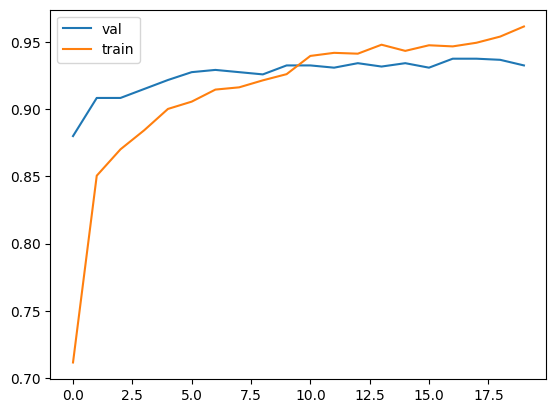

In [63]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Using the model

In [64]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import load_model

In [65]:
model_path = "/kaggle/working/model/xception_v1_best.keras"
model = load_model(model_path)
model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_14     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,479,212 (81.94 MB)

 Trainable params: 205,910 (804.34 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 411,822 (1.57 MB)

In [66]:
# Load the saved mapping
with open("/kaggle/working/model/class_mapping.json", "r") as f:
    class_mapping = {int(k): v for k, v in json.load(f).items()}

class_mapping

{0: 'black_dress',
 1: 'black_pants',
 2: 'black_shirt',
 3: 'black_shoes',
 4: 'black_shorts',
 5: 'blue_dress',
 6: 'blue_pants',
 7: 'blue_shirt',
 8: 'blue_shoes',
 9: 'blue_shorts'}

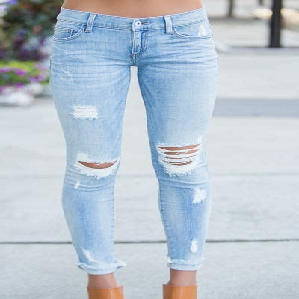

In [67]:
image_path = df_valid['filename'].iloc[0]
image = load_img(image_path, target_size=(input_size, input_size))
image

In [68]:
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array =  preprocess_input(image_array)

In [69]:
predictions = model.predict(image_array)
class_idx = np.argmax(predictions, axis=1)[0]
print("Prediction: ", class_mapping[class_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction:  blue_pants


In [70]:
class Predictor:
    """
    Class to load a trained model and make predictions on new data.
    """
    def __init__(self, model_path, class_mapping_path, input_size):
        self.model_path = model_path
        self.class_mapping_path = class_mapping_path
        self.input_size = input_size
        self.model = self._load_model()
        self.classes = self._load_classes()
        

    def _load_model(self):
        """
        Load the trained model from the given path.
        """
        return load_model(self.model_path)

    def _load_classes(self):
        """
        Load the class mapping from the given path.
        """
        with open(self.class_mapping_path, "r") as f:
            class_mapping = {int(k): v for k, v in json.load(f).items()}

        return class_mapping

    def preprocess_image(self, image_path):
        """
        Preprocess a single image for prediction.
        Args:
            image_path (str): Path to the image file.
        Returns:
            Preprocessed image array.
        """
        image = load_img(image_path, target_size=(self.input_size, self.input_size))
        image_array = img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
        return preprocess_input(image_array)

    def predict(self, image_path):
        """
        Make a prediction for a single image.
        Args:
            image_path (str): Path to the image file.
            category_mapping (dict): Mapping of class indices to category names.
        Returns:
            Predicted category.
        """
        preprocessed_image = self.preprocess_image(image_path)
        predictions = self.model.predict(preprocessed_image)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_category = self.classes[predicted_class_index]
        return predicted_category

In [71]:
# Parameters
model_path = "/kaggle/working/model/xception_v1_best.keras"
class_mapping_path = "/kaggle/working/model/class_mapping.json"
input_size = 299

# Create a predictor
predictor = Predictor(model_path, class_mapping_path, input_size)

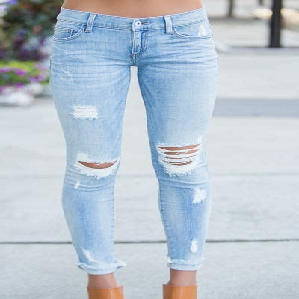

In [72]:
image_path = df_valid['filename'].iloc[0]
image = load_img(image_path, target_size=(input_size, input_size))
image

In [73]:
predicted_category = predictor.predict(image_path)
print(f"Predicted Category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Category: blue_pants
